# NON-LOCAL MEANS FILTERING

We import the images_tools file with all the functions we have created: 

In [1]:
from images_tools import *

## Introduction

**Non-Local Means** is an algorithm in image processing that removes the noise and clean the edges **without losing too many structures and details**. 

Unlike "Local Mean" filters, which take the mean value of a group of pixels surrounding a target pixel to smooth the image, Non-Local Means filtering takes a mean of all pixels in the image, weighted by how similar these pixels are to the target pixel. 


The **advantage** of this algorithm is that it provides a much greater post-filtering clarity and less loss of details in the image.

The main **disadvantages** are that if noise increases the performance of NLM deteriorates, and denoised image suffers from blurring and loss of image details. Besides, it is a very slow method because we have to process it for all the pixels in comparation to others.

During this notebook we are going to add **Gaussian noise** to our original images and work with this noisy image. We choose Gaussian noise instead of impulsive noise because algorithm works better with noise that is distributed in all the image and not only in certain pixels as impulsive noise (aleatory noise).

Gaussian noise is a statistical noise in which probability density responds to a Gaussian/Normal distribution. It presents a mean and a variance, whose value represent the intensity of the noise. In the notebook we are able to change the **variance** of this noise, by changing the **intensity parameter**.

In [2]:
img = mpimg.imread('nlm_img.jpg')    

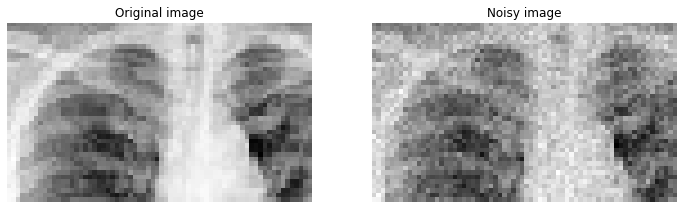

In [4]:
noisy = noisy_image('nlm_img.jpg','gaussian', 0.002)

Previous images, represent our **Original 48x68** and its corresponding **Gaussian noisy image**.

Original image has a 48x68 dimension because as we have previously mentioned, NLM filter is a very slow method so we need to perform algorithm with a smaller image.

 ## Basic 2D NLM filtering algorithm

Starting from our noisy image, we want to compare the performace of our **NLM algorithm** and the **Mean filter**.

In [5]:
# This is our NLM algorithm.
nlm_img = nlm(noisy)

In [6]:
# This is the Mean filter.
meanfilter_img = meanfilter(noisy)

(Text(0.5, 1.0, 'Filtered image (Mean filter)'), (-0.5, 67.5, 39.5, -0.5))

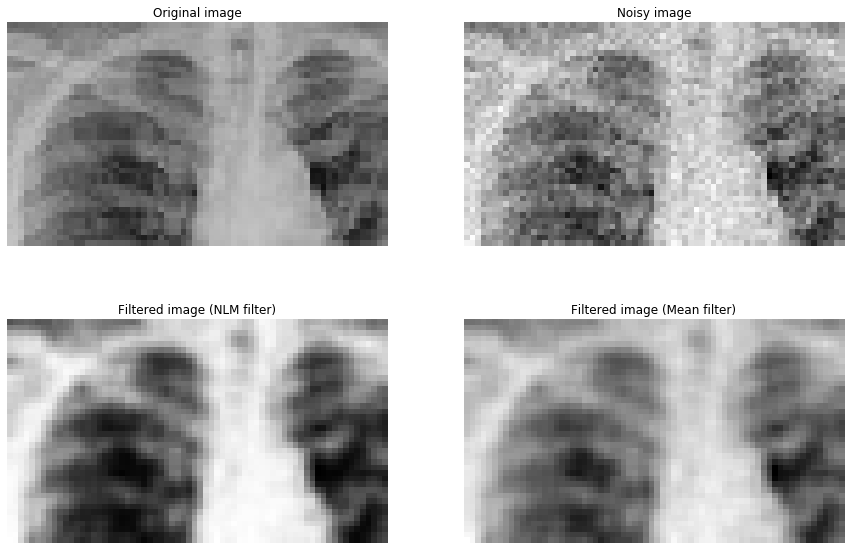

In [7]:
# Original image, noisy image, NLM filtered image and Mean filtered image are compared.

plt.figure(figsize=(15,10)) 

plt.subplot(221)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original image'), plt.axis('off')
plt.subplot(222)
plt.imshow(noisy, cmap=plt.cm.gray)
plt.title('Noisy image'), plt.axis('off')
plt.subplot(223)
plt.imshow(nlm_img, cmap=plt.cm.gray)
plt.title('Filtered image (NLM filter)'), plt.axis('off')
plt.subplot(224)
plt.imshow(meanfilter_img, cmap=plt.cm.gray)
plt.title('Filtered image (Mean filter)'), plt.axis('off')

### **Results**


In the image filtered with NLM algorithm, noise has been reduced but details and important structures have not been lose. For example, we can see how the bone structure and background are clearly differentiate between them.

However, if we use Mean filter, noise is going to be deleted but details and differentiation between structures are smoother than in NLM filtering.

## NLM algorithm enhancement

One of the problems of basic NLM algorithm is that iterating over all pixels in image, at a certain point you are going to compare the original patch to itself. This is problematic because we are losing accuracy in our denoise process.

That is the reason why we create some enhancement algorithm in order to improve the constrast of images and create a more accurate algorithm.

We compare basic NLM algorith with two types of enhancements:

### Compared to pixel itself :

In [8]:
nlm_itself_img = nlm_itself(noisy)

- Basic NLM algorithm and NLM algorith compared to itself :

(Text(0.5, 1.0, 'NLM enhancement with itself'), (-0.5, 67.5, 39.5, -0.5))

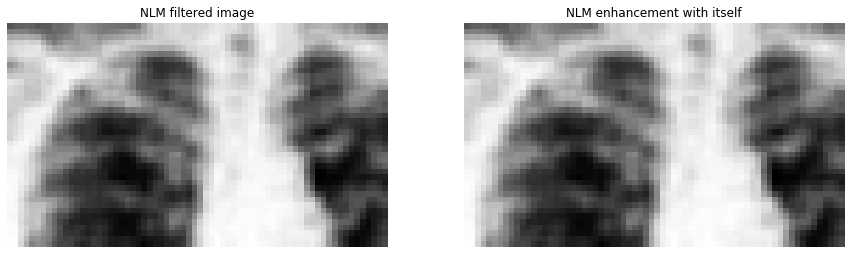

In [9]:
fig = plt.figure(figsize=(15, 15))
plt.subplot(121)
plt.imshow(nlm_img, cmap=plt.cm.gray)
plt.title('NLM filtered image'), plt.axis('off')
plt.subplot(122)
plt.imshow(nlm_itself_img, cmap=plt.cm.gray)
plt.title('NLM enhancement with itself'), plt.axis('off')

##Falta comentar entre imagenes rollo que no se ve bien ya son imágenes de muy poca calidad y tal vez DE AHI QUE SE PIERDA LO QUE QUEREMOS EXPLICAR PERO CON EL CUADRADO DE BLANCOS Y NEGROS SI SE VE (claro pero a ver que pasa con la mierda diagonal jeje)

**Results**

NLM enhancemnet in which we compared pixel itself change the values of the pixels that are being compared with themselves. This process results in a more accurate filtering of the noisy image and a better contrast between structures.

However, when looking at the images these mentioned differences are not clearly seen as we are working with very low quality images with low resolution. Moreover, if we focuse our attention in the bone part we might slightly seen some differeces in contrast as the enhacement image have a wider gray range.

### NLM- CPP:

In [10]:
nlm_cpp_img = nlm_cpp(noisy)

- Basic NLM algorithm and NLM-CPP : 

(Text(0.5, 1.0, 'NLM CPP filtered image'), (-0.5, 67.5, 39.5, -0.5))

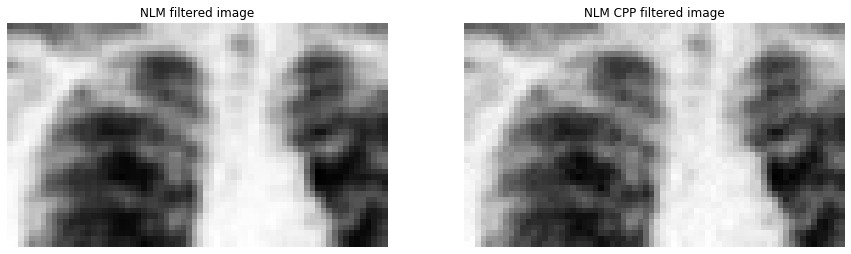

In [11]:
fig = plt.figure(figsize=(15, 15))
plt.subplot(121)
plt.imshow(nlm_img, cmap=plt.cm.gray)
plt.title('NLM filtered image'), plt.axis('off')
plt.subplot(122)
plt.imshow(nlm_cpp_img, cmap=plt.cm.gray)
plt.title('NLM CPP filtered image'), plt.axis('off')

**Results**

NLM basic filter has the disadvantage that can smooth certain details that are really important for the diagnosis. In order to avoid excessive smooth, we weight the original weight w(i,j) of the basic NLM filter. So now, NLM filter also depends on similarity between central pixels.

However, as its main function is to reduce smooth, the main disadvantage of CPP enhancement is that in some points it is not going to reduce noise as much as the basic NLM algorithm.

Then, as we can see in the images we obtain the expected results. The NLM CPP filtered image has more noise as a result of reducing smoothing.

## Conclusions

We compare all our previous results (Basic NLM, NLM enhancements) with the implementation of the denoise_nl_means function
of the skimage.restoration package.

In [25]:
check_img = denoise_nl_means(noisy, h=1, patch_size =3, patch_distance=1)

(Text(0.5, 1.0, 'Denoise NLM filtered image'), (-0.5, 67.5, 39.5, -0.5))

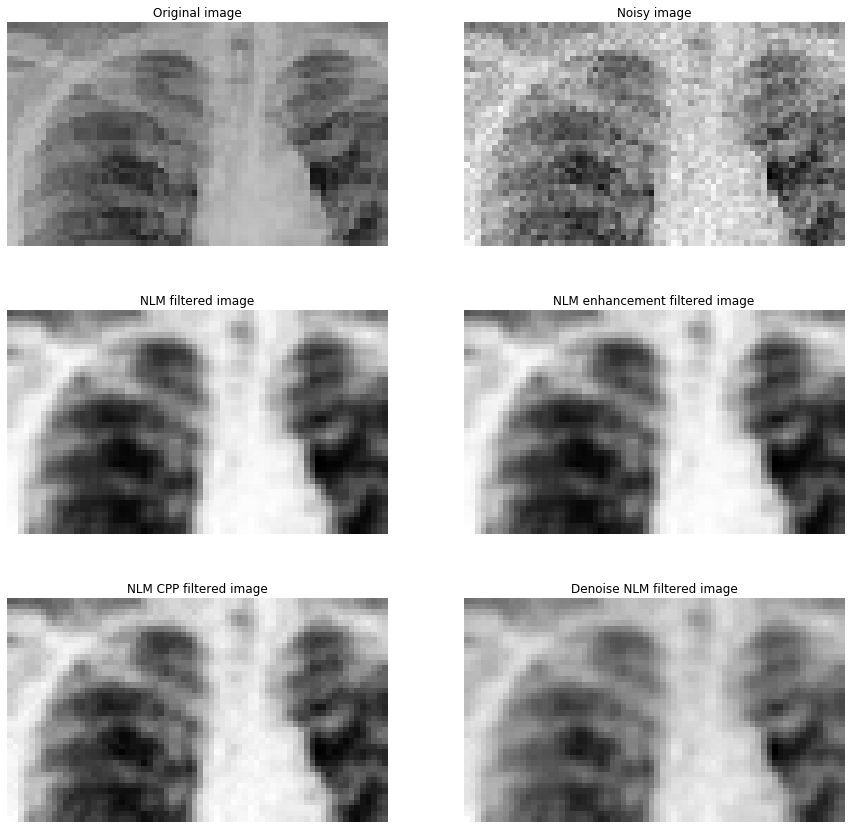

In [26]:
fig = plt.figure(figsize=(15, 15))
plt.subplot(321)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original image'), plt.axis('off')

plt.subplot(322)
plt.imshow(noisy, cmap=plt.cm.gray)
plt.title('Noisy image'), plt.axis('off')

plt.subplot(323)
plt.imshow(nlm_img, cmap=plt.cm.gray)
plt.title('NLM filtered image'), plt.axis('off')

plt.subplot(324)
plt.imshow(nlm_itself_img, cmap=plt.cm.gray)
plt.title('NLM enhancement filtered image'), plt.axis('off')

plt.subplot(325)
plt.imshow(nlm_cpp_img, cmap=plt.cm.gray)
plt.title('NLM CPP filtered image'), plt.axis('off')

plt.subplot(326)
plt.imshow(check_img, cmap=plt.cm.gray)
plt.title('Denoise NLM filtered image'), plt.axis('off')

When comparing different algorithms we obtain the following conclusions:

- Basic NLM algorithm reduces noise of the image and also preserves several details and structures.
- NLM enhancement comparing with pixel itself creates a higher contrast between structures as well as it reduces the noise of image. 
- NLM CPP enhancement avoids an excessive smoothing and this result in a worse reduction of noise. However, it preserves certain details that are really important for the diagnosis. 
- Finally, if we compare the denoise_nl_means filtered image with the previous ones, we see how resulting image is completely smooth, that means noise is almost completly reduced, but it does not preserve really well the structures. On the other hand, our resulting images maintain a higher contrast that might be the result of the different functioning of the algorithms.

To perform the different implementations we have to take into account several parameters:

- For all the Non-Local Means algorithms (Basic, Compared to pixel itself, CPP, and denoise_nl_means) we use parameter h. It is a similarity parameter that controls the degree of smoothing to be applied. It makes a filter more or less agressive. In our case, we have fixed h=1, because a low value for h implies a less smooth between dissimilar patches of the image. This is better in order to distiguish different structures.


- D0 and Alpha parameters are used in NLM-CPP filtering. They are parameters that are used to highlight the differences between pixels we are comparing. We have fixed these parameters in 1 because when proving with different values we realized that best results were obtained with value fixed at 1.

### References

https://en.wikipedia.org/wiki/Non-local_means


https://www.researchgate.net/publication/236272489_Image_denoising_based_on_non-local_means_filter_and_its_method_noise_thresholding


Slides. Chapter 3


https://scikit-image.org/docs/dev/api/skimage.restoration.html#skimage.restoration.denoise_nl_means

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4313935/

### Contribution

On the one hand, Sofía made the code and the explanations for the algorithm and Lucía and Sandra made the notebook. However, we have done periodic meeetings in order to help each other and check if everything was alright.